# Analysis of the dataset

In [57]:
import pandas as pd
import os
import numpy as np

DATA_PATH = "./"

def load_train_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "train.csv")
    return pd.read_csv(csv_path)

In [58]:
dataset = load_train_data()

In [59]:
dataset.shape

(58881, 129)

### So we have 58881 * data(128 features) + 58881 * target(label)
    - Feature array shape (58881, 128) 
    - Target array shape  (58881, 1)

In [60]:
dataset.head(5)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,A8,26,0.230769,2,3,1,0.492537,0.563636,0.225941,...,0,0,0,0,0,0,0,0,0,7
1,1,D2,26,1.000000,3,3,1,0.671642,0.781818,0.326360,...,0,0,0,0,0,0,0,0,0,6
2,1,D2,26,0.230769,2,3,1,0.626866,0.745455,0.393305,...,0,0,0,0,0,0,0,0,0,1
3,1,D4,26,0.230769,2,3,1,0.268657,0.690909,0.246862,...,0,0,0,0,0,0,0,0,0,4
4,1,E1,10,0.230769,2,3,1,0.641791,0.581818,0.466527,...,0,0,1,0,0,0,1,0,0,2


In [61]:
dataset.dtypes.value_counts()

int64      107
float64     18
object       4
dtype: int64

    3 types of data:
        - int
        - float
        - object(string)

### So we need to transform character type data into integers 
    - We decide to use onehotencode to eliminate the influence of number size 
    - when transformed into integers

In [62]:
dataset[dataset.columns[(dataset.dtypes == 'object')==True]].head(5)

,Product_Info_2,InsuredInfo_7,InsuredInfo_8,InsuredInfo_9
0,A8,Female,NaN,Muslim
1,D2,Male,NaN,NaN
2,D2,Male,Caucasian,Jewish
3,D4,Female,NaN,NaN
4,E1,Female,NaN,NaN


In [63]:
dataset[dataset.columns[(dataset.dtypes == 'float64')==True]].head(5)

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,0.230769,0.492537,0.563636,0.225941,0.510720,0.0244,0.0,0.05,NaN,0.681159,NaN,0.492958,NaN,0.0,NaN,NaN,NaN,NaN
1,1.000000,0.671642,0.781818,0.326360,0.453033,0.5000,0.5,1.00,0.006667,NaN,0.490196,NaN,0.589286,4.0,NaN,196.0,196.0,NaN
2,0.230769,0.626866,0.745455,0.393305,0.598310,0.0400,0.0,0.60,0.000833,NaN,0.558824,NaN,0.598214,3.0,NaN,240.0,NaN,NaN
3,0.230769,0.268657,0.690909,0.246862,0.410638,0.0300,0.0,0.00,NaN,0.536232,NaN,0.478873,NaN,12.0,NaN,NaN,NaN,NaN
4,0.230769,0.641791,0.581818,0.466527,1.000000,0.0280,0.0,1.00,0.000039,NaN,0.647059,NaN,0.160714,1.0,NaN,NaN,NaN,NaN


In [64]:
dataset.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,...,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000,58881.000000
mean,1.026426,24.414956,0.328874,2.006946,2.673545,1.043681,0.405636,0.707294,0.292587,0.469455,...,0.056979,0.010020,0.045482,0.010649,0.007524,0.013740,0.008475,0.019956,0.054568,5.636097
std,0.160400,5.073111,0.282548,0.083055,0.739153,0.292271,0.197211,0.074246,0.089009,0.122168,...,0.231805,0.099599,0.208360,0.102642,0.086413,0.116409,0.091668,0.139849,0.227136,2.457097
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


### We can know from the table that some columns have been Normalized  0 ≤ value ≤ 1 
    - So we may need to normalize those other data

In [65]:
total_num = dataset.shape[0]
nan_counts = dataset.notnull().sum()[dataset.notnull().sum() != 58881].sort_values(ascending=False)
nan_num = nan_counts.shape[0]
(total_num - nan_counts)  / total_num

Employment_Info_1      0.000323
Employment_Info_4      0.114078
Medical_History_1      0.149607
Employment_Info_6      0.182623
Family_Hist_4          0.323177
Insurance_History_5    0.427642
Family_Hist_2          0.482702
Family_Hist_3          0.576621
Family_Hist_5          0.703996
InsuredInfo_9          0.749410
Medical_History_15     0.750972
InsuredInfo_8          0.879197
Medical_History_24     0.935939
Medical_History_32     0.981318
Medical_History_10     0.990642
dtype: float64

### So, the dataset have empty cells in some columns If we want to keep those data for processing, 
    - we need to fill empty cells or delete these columns if not important for model trainning
    - Like Medical_History_10, Medical_History_32, Medical_History_24 they all lack of so many 
    - data in their column, so we can ignore them.

In [66]:
dataset.columns[-1]

'Response'

In [67]:
# Column Response => Column Target 

In [68]:
# Create numpy arrays for features and target
df_X = dataset.drop('Response',axis=1)
df_y = dataset['Response']
print("Shape of features array" , df_X.shape)
print("Shape of target array" ,df_y.shape)

Shape of features array (58881, 128)
Shape of target array (58881,)


### Visualize the distribution of target

(array([ 6158.,     0.,  6495.,     0.,     0.,  1009.,     0.,     0.,
         1420.,     0.,     0.,  5390.,     0.,     0., 11136.,     0.,
            0.,  7946.,     0., 19327.]),
 array([1.  , 1.35, 1.7 , 2.05, 2.4 , 2.75, 3.1 , 3.45, 3.8 , 4.15, 4.5 ,
        4.85, 5.2 , 5.55, 5.9 , 6.25, 6.6 , 6.95, 7.3 , 7.65, 8.  ]),
 <a list of 20 Patch objects>)

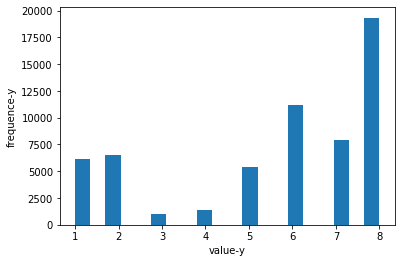

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("value-y")
plt.ylabel("frequence-y")
plt.hist(df_y.values, bins=20)

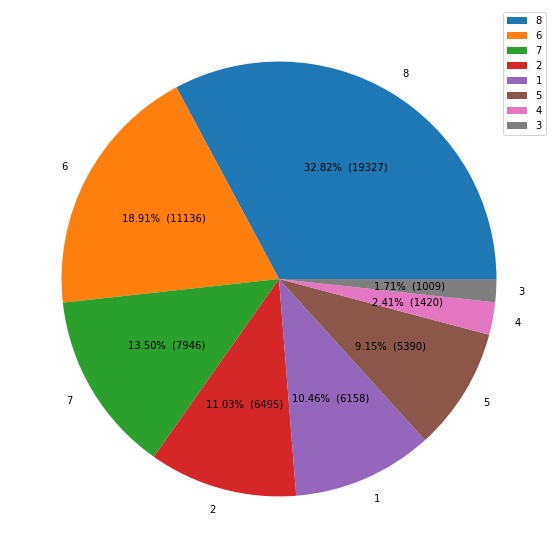

In [70]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(10,10))
plt.pie(df_y.value_counts(), labels=df_y.value_counts().index, autopct=make_autopct(df_y.value_counts()))
plt.legend()

### Check the corr matrix of x, and  x_y

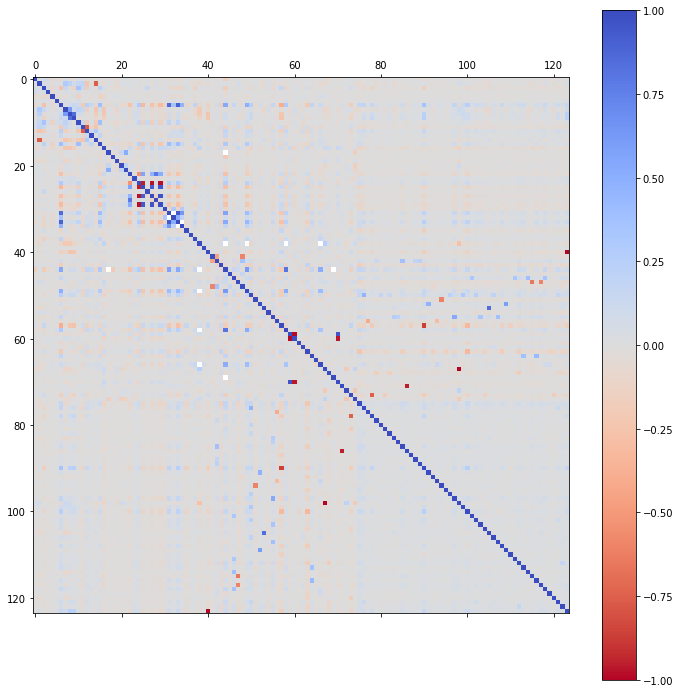

In [71]:
corr_matrix_XX = df_X.corr()
plt.rcParams['figure.figsize'] = (12, 12)
plt.matshow(corr_matrix_XX, cmap=plt.cm.coolwarm_r, vmin=-1, vmax=1)
plt.colorbar()

### If two features have a very high correlation rate,
    - we can eliminate one of them if it is sensible to the system

In [78]:
dataset = dataset.drop(["Product_Info_2","InsuredInfo_7","InsuredInfo_8","InsuredInfo_9"],axis=1)
corr_matrix_XY = dataset.drop("Response", axis=1).apply(lambda x: x.corr(dataset.Response))

In [100]:
abs_correlation = abs(corr_matrix_XY).sort_values(ascending=False, axis=0)
abs_correlation[abs_correlation <= 0.005]

Medical_Keyword_45     0.004952
Product_Info_7         0.004825
Medical_Keyword_8      0.004202
Family_Hist_3          0.003265
Product_Info_5         0.002011
Insurance_History_1    0.001034
Medical_History_26     0.000601
Medical_History_36     0.000580
Insurance_History_4    0.000567
Medical_History_25     0.000428
dtype: float64

### If the correlation between X,y is less than 0.05
    - We may choose to ignore those features,
    - because they don't have much influence on the result.